# Gaussian Mixture Model (GMM)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os, numpy as np
from scipy.io import loadmat
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
rcParams.update({'font.size': 12})

## For info on eigenmodes see part 1

keys cats: __header__ __version__ __globals__ cat_wave


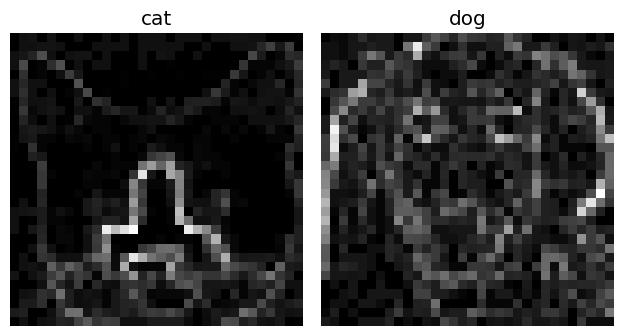

In [2]:
cats2 = loadmat(os.path.join('data_processing','media','catData_w.mat'))
dogs2 = loadmat(os.path.join('data_processing','media','dogData_w.mat'))
print('keys cats:',*cats2.keys())
cats_data2 = cats2['cat_wave']
dogs_data2 = dogs2['dog_wave']

fig, ax = plt.subplots(1,2,tight_layout=True)
cat_w_img = cats_data2[:,0].reshape(32,32).T
ax[0].imshow(cat_w_img, 'gray')
dog_w_img = dogs_data2[:,0].reshape(32,32).T
ax[1].imshow(dog_w_img, 'gray')
ax[0].set_title('cat')
ax[0].axis('off')
ax[1].set_title('dog')
ax[1].axis('off');

Colums of V contain coeficients for modes for linear combination of image reconstruction.

If we are intersted in how images are represented in 2D latent space of modes-<br>
for each image, what are coeficient pair for mode A and mode B ( coorinates (A,B)),<br>
we take row A and B

In [3]:
cats_dogs2 = np.hstack((cats_data2,dogs_data2)); print(cats_dogs2.shape)
U2,S2,V2 = np.linalg.svd(cats_dogs2-np.mean(cats_dogs2, axis= 0),full_matrices=False)
modeA = 1; modeB = 2
coordsAB = V2[[modeA,modeB]]

GMModel = GaussianMixture(n_components=2)
GMModel.fit(coordsAB.T)
AIC = GMModel.aic(coordsAB.T)

(1024, 160)


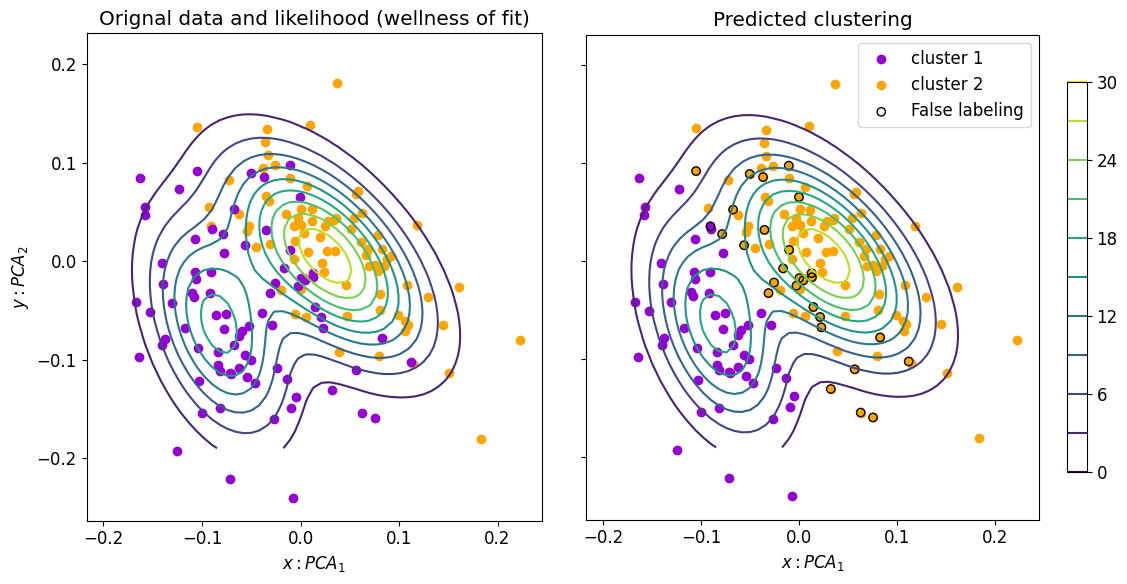

In [4]:

mn1,mn2 = np.min(coordsAB, axis = 1) + [-0.05,0.05]
mx1,mx2 = np.max(coordsAB, axis = 1) + [-0.05,0.05]

x = np.linspace(mn1, mx1, 50)
y = np.linspace(mn2, mx2, 50)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = np.exp(GMModel.score_samples(XX))
Z = Z.reshape(X.shape)

fig, ax = plt.subplots(1,2,tight_layout=True, figsize = (12,6), sharex=True, sharey=True)
ax[0].scatter(*coordsAB[:,:80], color= 'orange')
ax[0].scatter(*coordsAB[:,80:], color= 'darkviolet')

ax[0].contour(X, Y, Z, levels = 10)

ax[0].set_xlabel(f'$x: PCA_{modeA}$')
ax[0].set_ylabel(f'$y: PCA_{modeB}$')
ax[0].set_title('Orignal data and likelihood (wellness of fit)')
ax[0].set_aspect('equal')

probs = GMModel.predict_proba(coordsAB.T)
class_labels = np.argmax(probs, axis=1).astype(bool)
# select based on cluster
class_1 = coordsAB.T[class_labels]
class_2 = coordsAB.T[~class_labels]
# true labels half cluster 1, half cluster 2
og_class_labels = np.zeros_like(class_labels)
og_class_labels[80:] = True
# mark incorrect determined class
class_false = coordsAB.T[class_labels != og_class_labels]

ax[1].scatter(*class_1.T, label= 'cluster 1', color= 'darkviolet')
ax[1].scatter(*class_2.T, label= 'cluster 2', color= 'orange') 

ax[1].scatter(*class_false.T, label= 'False labeling', edgecolors='black', facecolor='none') 
CS = ax[1].contour(X, Y, Z, levels = 10)
CB = plt.colorbar(CS, shrink=0.8, extend="both")
ax[1].set_xlabel(f'$x: PCA_{modeA}$')
ax[1].set_title('Predicted clustering')
ax[1].set_aspect('equal')
plt.legend()